## Import Libs

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)

## ML Utils Libs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

In [9]:
class MachineLearningAnalyzer():
    
    def __init__(self, file_path):
        self.file_path = file_path
        self.colors = [
            "blue",
            "orange",
            "green",
            "red",
            "purple",
            "brown",
            "pink",
            "gray",
            "olive",
            "cyan",
            "blue",
            "orange",
            "green",
            "red",
            "purple",
        ]
        self.__load_datasource()
        self.__plot_data()
        
    def perform_analysis(self):
        results = self.__train_and_predict()
        return results
    
    def __load_datasource(self):
        print("Loading datasource from %s" % (self.file_path))
        self.datasource = pd.read_csv(self.file_path, index_col = 0).sort_values(by=['time_frame'])
        print("Datasource loaded: len = %d" % (len(self.datasource)))
        self.entrypoints = [key for key in self.datasource.keys() if "ENTRYPOINT_N_INVOC_API" in key]
        print("Entrypoints size: %d" % (len(self.entrypoints)))
        print("Entrypoint list")
        pp.pprint(self.entrypoints)
        
    def __plot_data(self):
        titles = self.entrypoints
        feature_keys = self.entrypoints
        date_time_key = "time_frame"
        self.__show_raw_visualization(data = self.datasource, date_time_key = date_time_key, titles = titles, feature_keys = feature_keys, colors = self.colors)


    def __show_raw_visualization(self, data, titles, feature_keys, colors, date_time_key):
        time_data = data[date_time_key]
        fig, axes = plt.subplots(
            nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
        )
        for i in range(len(feature_keys)):
            key = feature_keys[i]
            # print(key)
            c = colors[i % (len(colors))]
            t_data = data[key]
            t_data.index = time_data
            t_data.head()
            ax = t_data.plot(
                ax=axes[i // 2, i % 2],
                color=c,
                title="{}".format(titles[i]),
                rot=25,
            )
            ax.legend([titles[i]])
        plt.tight_layout()
        plt.show()
        
    def __train_and_predict(self, limit_plot = 10):
        X_cols = [key for key in self.datasource.keys() if "ENDPOINT_N_INVOC_API" in key]
        y_cols = [key for key in self.datasource.keys() if "ENTRYPOINT_AVG_EXTIME" in key]
        
        
        #normalized_ds = (datasource-datasource.mean())/datasource.std()
        normalized_ds=(self.datasource-self.datasource.min())/(self.datasource.max()-self.datasource.min())
        print("Data normalized")
        
        X = normalized_ds[X_cols].copy()
        y = normalized_ds[y_cols].copy()

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1, shuffle=False)

        input_len = X_train.shape[1]
        output_len = y_train.shape[1]

        print("Input size", input_len, "Output size", output_len)
        
        self.model = RandomForestRegressor(max_depth=4, random_state=0)
        
        self.model.fit(X_train, y_train)
        
        predictions = self.model.predict(X_test)
        
        results_dict = {}
        
        results_dict["TOTAL MSE"] = mean_squared_error(predictions, y_test.to_numpy())
        results_dict["TOTAL MAE"] = mean_absolute_error(predictions, y_test.to_numpy())
        
        print("TOTAL MSE: ", mean_squared_error(predictions, y_test.to_numpy()))
        print("TOTAL MAE: ", mean_absolute_error(predictions, y_test.to_numpy()))
        
        for idx in range(len(predictions[:limit_plot])):
            print("\n\n====== Prediction for %d ========" % (idx))
            plt.plot(predictions[idx], label="Prediction")
            plt.plot(y_test.to_numpy()[idx], label="Actual values")
            plt.legend()
            plt.show()
        
        transposed_preds = predictions.transpose()
        transposed_vals = y_test.to_numpy().transpose()

        for idx in range(len(transposed_preds)):
            print("\n\n========= FEATURE %d ANALYSIS (%s) ==========" % (idx, y_test.keys()[idx]))
            plt.plot(transposed_preds[idx], label="Prediction")
            plt.plot(transposed_vals[idx], label="Actual values")
            plt.legend()
            plt.show()
            print("MAE: ", mean_absolute_error(transposed_preds[idx], transposed_vals[idx]))
            print("MSE: ", mean_squared_error(transposed_preds[idx], transposed_vals[idx]))
            
            results_dict[y_test.keys()[idx] + " MAE"] = mean_absolute_error(transposed_preds[idx], transposed_vals[idx])
            results_dict[y_test.keys()[idx] + " MSE"] = mean_squared_error(transposed_preds[idx], transposed_vals[idx])
        
        return results_dict

In [10]:
results = {}

Loading datasource from avv_dataset_DT_500.csv
Datasource loaded: len = 2589
Entrypoints size: 13
Entrypoint list
[   'ENTRYPOINT_N_INVOC_API_ts-consign-service:findByOrderId',
    'ENTRYPOINT_N_INVOC_API_ts-consign-service:updateConsign',
    'ENTRYPOINT_N_INVOC_API_ts-travel-plan-service:getByCheapest',
    'ENTRYPOINT_N_INVOC_API_ts-preserve-service:preserve',
    'ENTRYPOINT_N_INVOC_API_ts-contacts-service:findContactsByAccountId',
    'ENTRYPOINT_N_INVOC_API_ts-food-service:getAllFood',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:queryOrdersForRefresh',
    'ENTRYPOINT_N_INVOC_API_ts-cancel-service:cancelTicket',
    'ENTRYPOINT_N_INVOC_API_ts-inside-payment-service:pay',
    'ENTRYPOINT_N_INVOC_API_ts-auth-service:getToken',
    'ENTRYPOINT_N_INVOC_API_ts-travel-service:queryInfo',
    'ENTRYPOINT_N_INVOC_API_ts-assurance-service:getAllAssuranceType',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:POST']


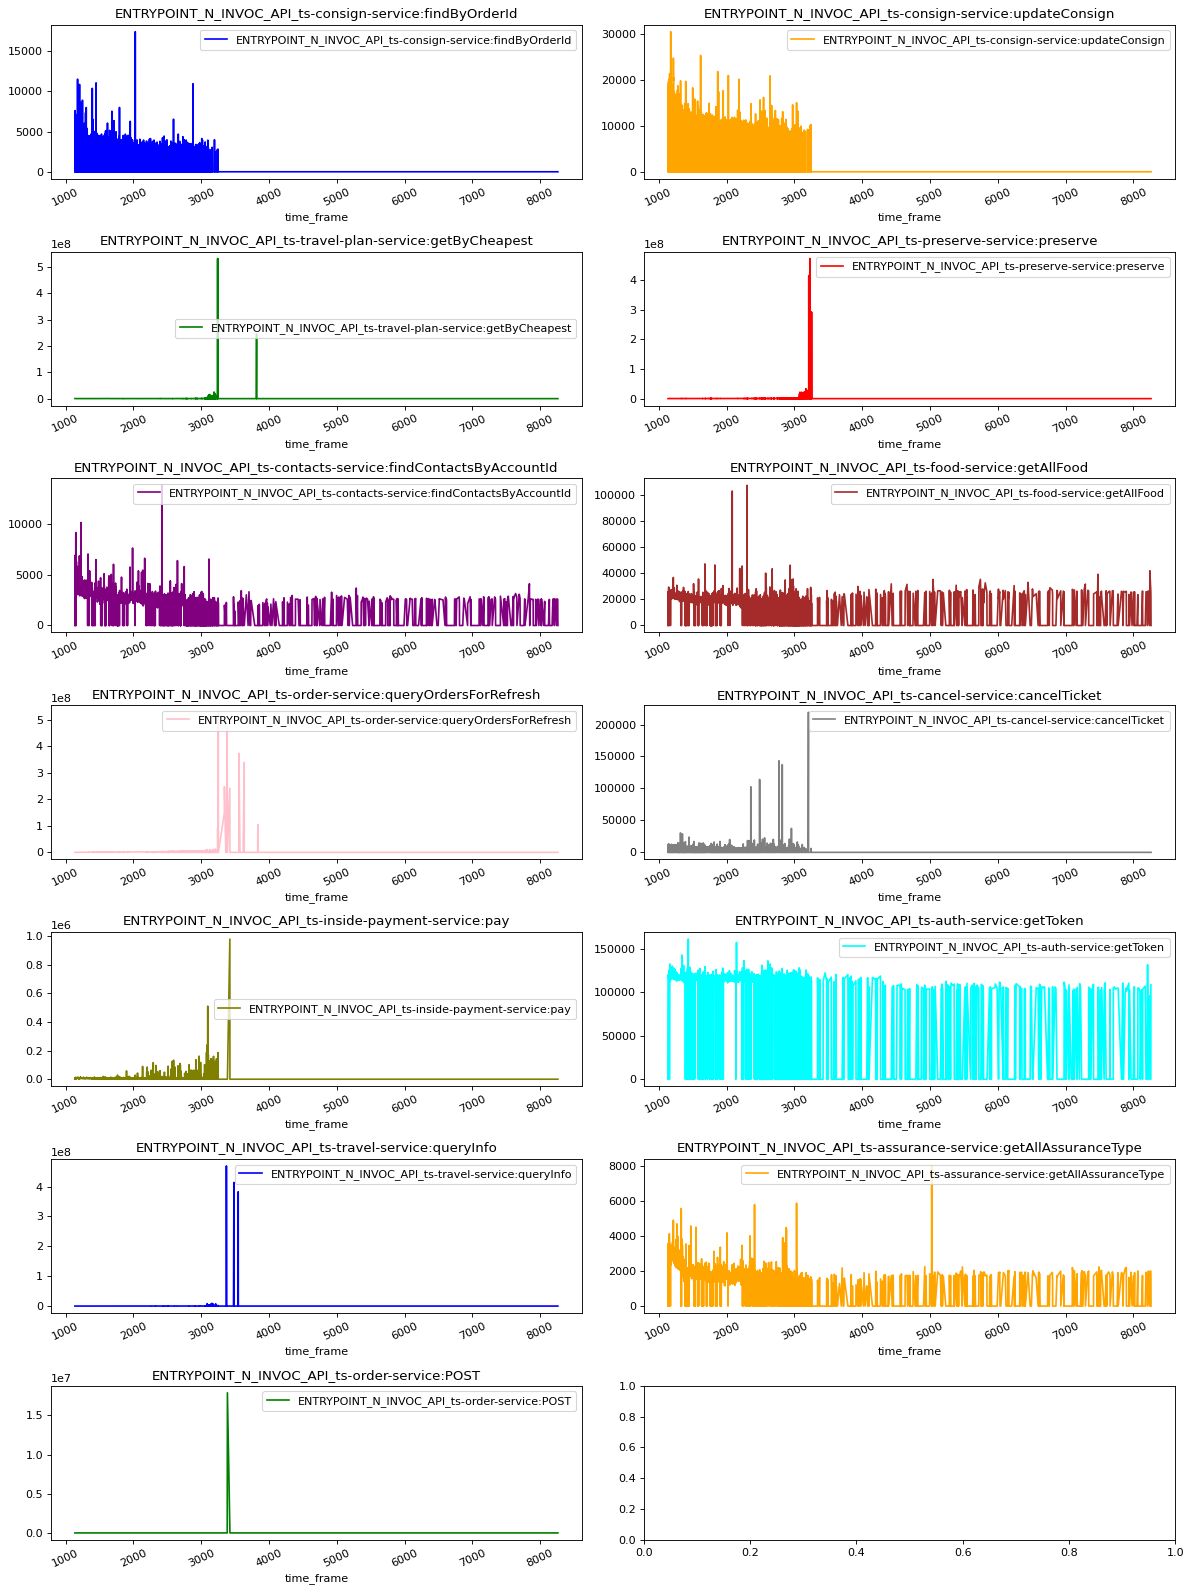

Data normalized
Input size 32 Output size 13
TOTAL MSE:  0.015532254726816177
TOTAL MAE:  0.035804537590664993


====== Prediction for 0 ========


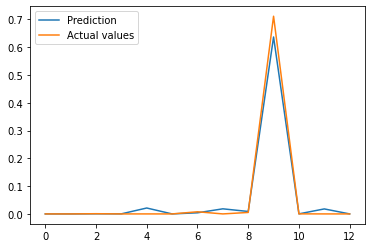



====== Prediction for 1 ========


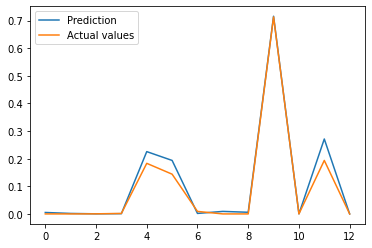



====== Prediction for 2 ========


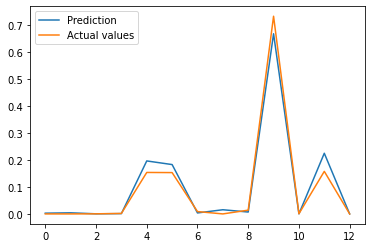



====== Prediction for 3 ========


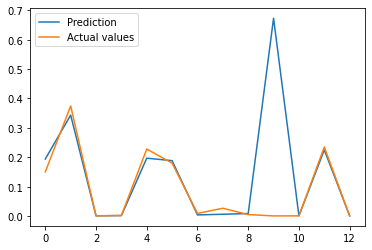



====== Prediction for 4 ========


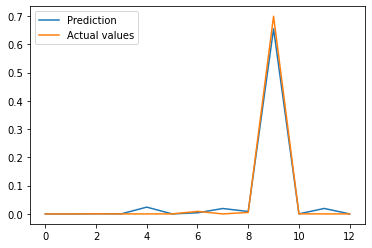



====== Prediction for 5 ========


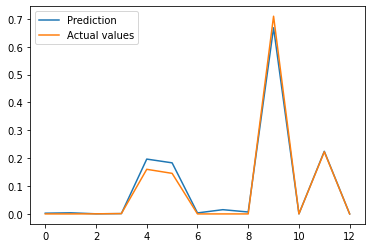



====== Prediction for 6 ========


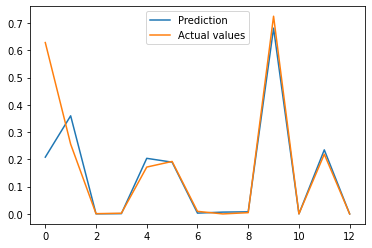



====== Prediction for 7 ========


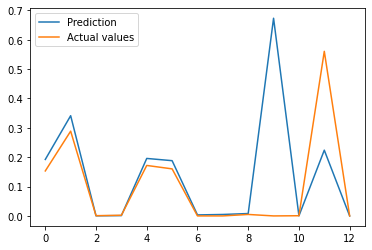



====== Prediction for 8 ========


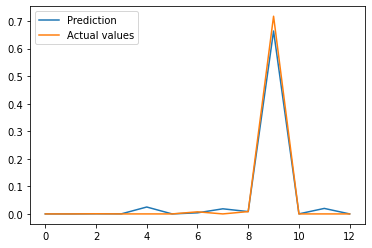



====== Prediction for 9 ========


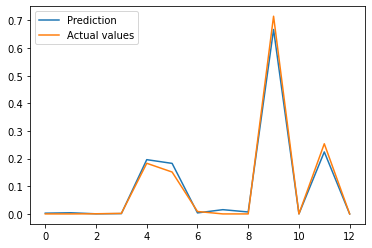



========= FEATURE 0 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:findByOrderId) ==========


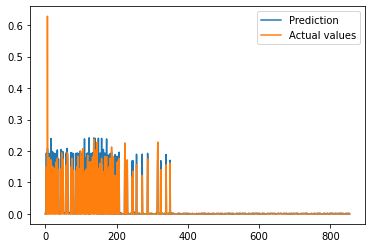

MAE:  0.00471715185570506
MSE:  0.0003985457273976054


========= FEATURE 1 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:updateConsign) ==========


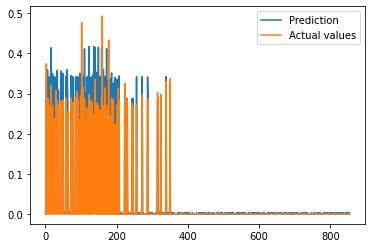

MAE:  0.008302167060739836
MSE:  0.0007389744289518812


========= FEATURE 2 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-plan-service:getByCheapest) ==========


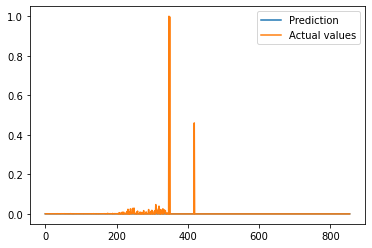

MAE:  0.004052186625919919
MSE:  0.0025972053278370067


========= FEATURE 3 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-preserve-service:preserve) ==========


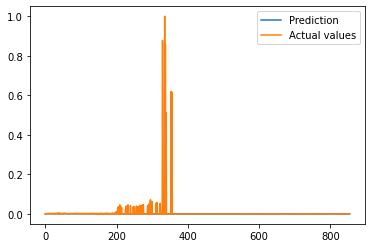

MAE:  0.007078787847583851
MSE:  0.00418048714481561


========= FEATURE 4 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-contacts-service:findContactsByAccountId) ==========


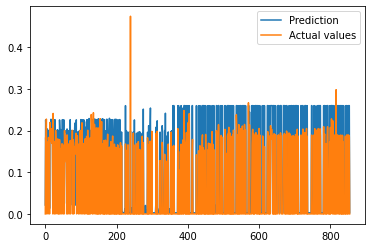

MAE:  0.03289143821551379
MSE:  0.0032084757231997806


========= FEATURE 5 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-food-service:getAllFood) ==========


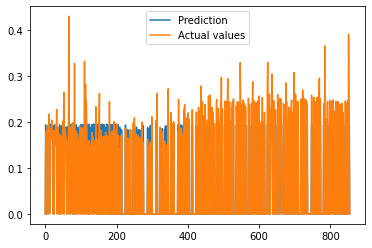

MAE:  0.01613289939769843
MSE:  0.0011291158621980493


========= FEATURE 6 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:queryOrdersForRefresh) ==========


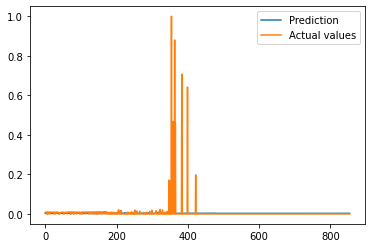

MAE:  0.009298105966048407
MSE:  0.0038271959304167578


========= FEATURE 7 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-cancel-service:cancelTicket) ==========


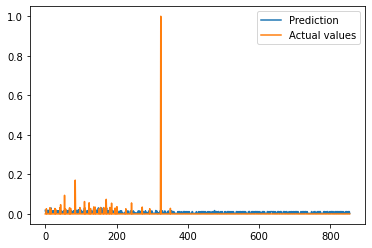

MAE:  0.009109783637758615
MSE:  0.001297996817474961


========= FEATURE 8 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-inside-payment-service:pay) ==========


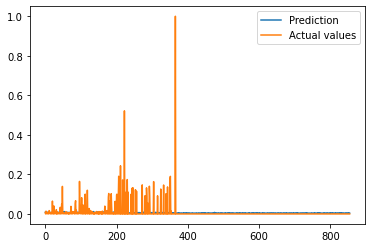

MAE:  0.0119959062950547
MSE:  0.002205920232536962


========= FEATURE 9 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-auth-service:getToken) ==========


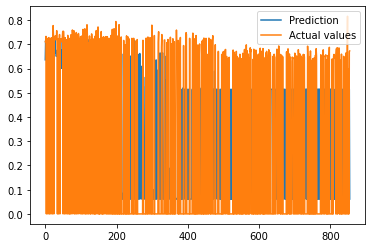

MAE:  0.3329150040021752
MSE:  0.175544426646481


========= FEATURE 10 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-service:queryInfo) ==========


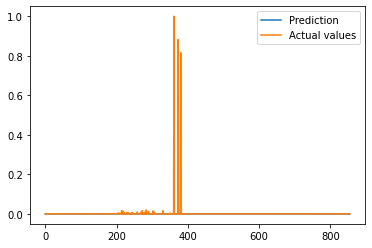

MAE:  0.003564895994407023
MSE:  0.0028603537162899344


========= FEATURE 11 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-assurance-service:getAllAssuranceType) ==========


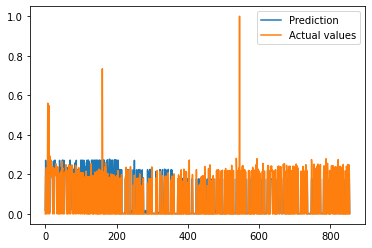

MAE:  0.024231071136763753
MSE:  0.0027610232477367222


========= FEATURE 12 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:POST) ==========


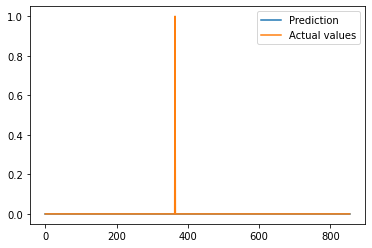

MAE:  0.0011695906432748538
MSE:  0.0011695906432748538


In [11]:
results["avv_dataset_DT_500.csv"] = MachineLearningAnalyzer("avv_dataset_DT_500.csv").perform_analysis()

Loading datasource from avv_dataset_DT_100.csv
Datasource loaded: len = 10861
Entrypoints size: 13
Entrypoint list
[   'ENTRYPOINT_N_INVOC_API_ts-consign-service:findByOrderId',
    'ENTRYPOINT_N_INVOC_API_ts-travel-plan-service:getByCheapest',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:queryOrdersForRefresh',
    'ENTRYPOINT_N_INVOC_API_ts-inside-payment-service:pay',
    'ENTRYPOINT_N_INVOC_API_ts-preserve-service:preserve',
    'ENTRYPOINT_N_INVOC_API_ts-contacts-service:findContactsByAccountId',
    'ENTRYPOINT_N_INVOC_API_ts-consign-service:updateConsign',
    'ENTRYPOINT_N_INVOC_API_ts-food-service:getAllFood',
    'ENTRYPOINT_N_INVOC_API_ts-cancel-service:cancelTicket',
    'ENTRYPOINT_N_INVOC_API_ts-auth-service:getToken',
    'ENTRYPOINT_N_INVOC_API_ts-assurance-service:getAllAssuranceType',
    'ENTRYPOINT_N_INVOC_API_ts-travel-service:queryInfo',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:POST']


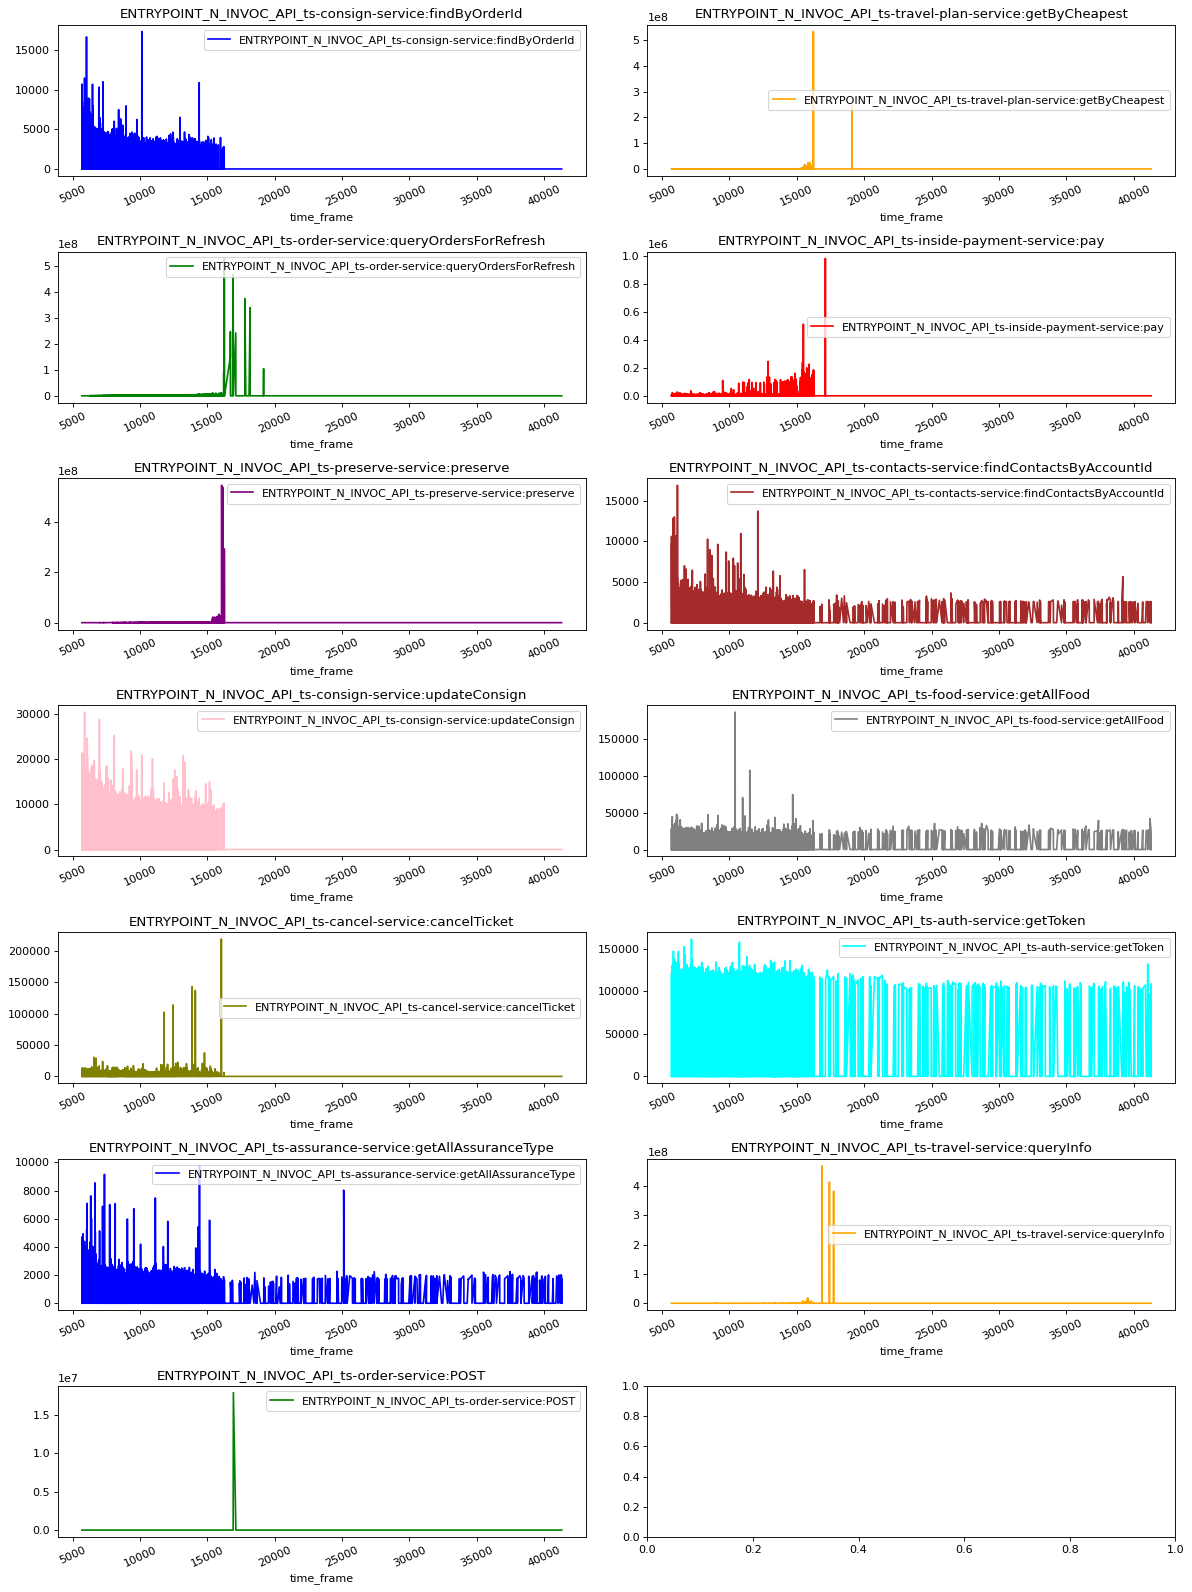

Data normalized
Input size 32 Output size 13
TOTAL MSE:  0.008037463516327333
TOTAL MAE:  0.02804790061517159


====== Prediction for 0 ========


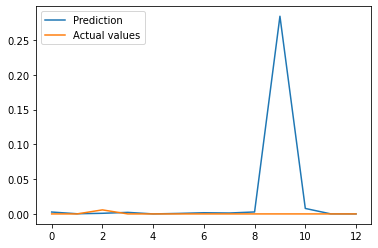



====== Prediction for 1 ========


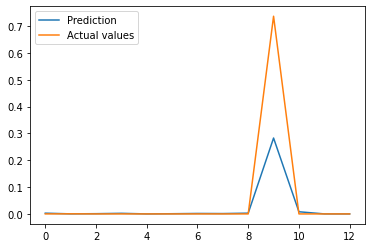



====== Prediction for 2 ========


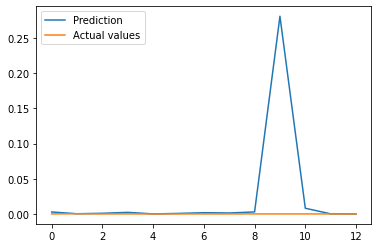



====== Prediction for 3 ========


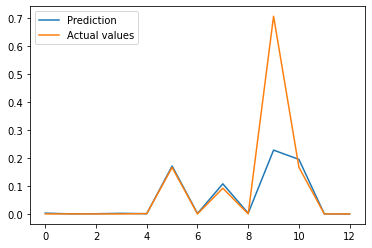



====== Prediction for 4 ========


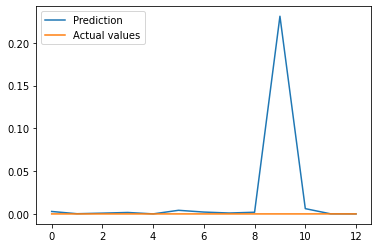



====== Prediction for 5 ========


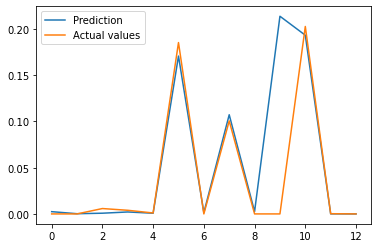



====== Prediction for 6 ========


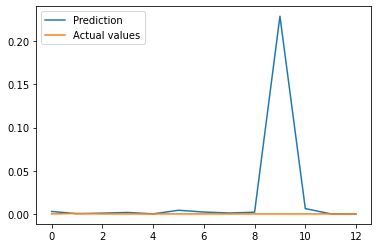



====== Prediction for 7 ========


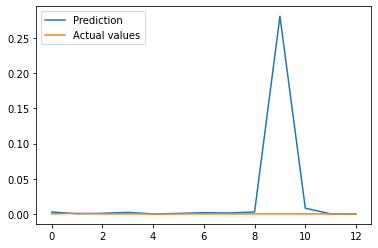



====== Prediction for 8 ========


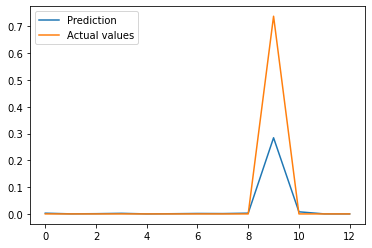



====== Prediction for 9 ========


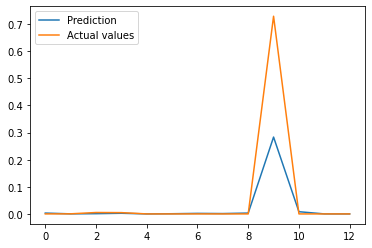



========= FEATURE 0 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:findByOrderId) ==========


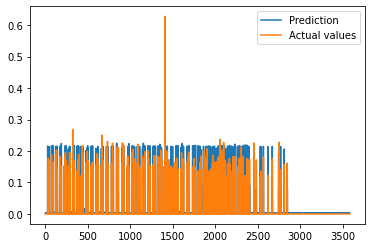

MAE:  0.00656311440279266
MSE:  0.000422244135782845


========= FEATURE 1 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-plan-service:getByCheapest) ==========


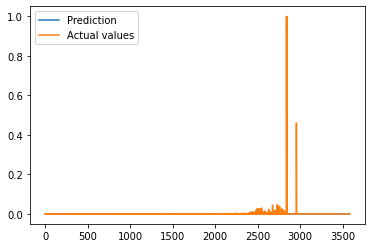

MAE:  0.0012548350936629573
MSE:  0.0006220167760307126


========= FEATURE 2 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:queryOrdersForRefresh) ==========


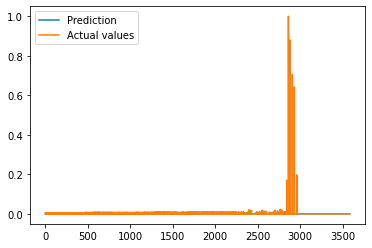

MAE:  0.003173041665159645
MSE:  0.0009235858043890637


========= FEATURE 3 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-inside-payment-service:pay) ==========


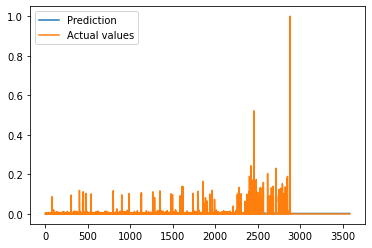

MAE:  0.005319627649549867
MSE:  0.0006780799935908109


========= FEATURE 4 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-preserve-service:preserve) ==========


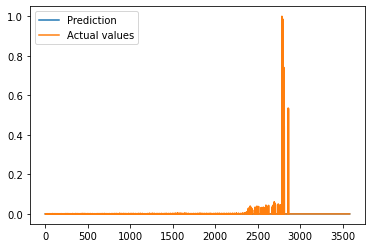

MAE:  0.0021028222726658767
MSE:  0.001159869110896026


========= FEATURE 5 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-contacts-service:findContactsByAccountId) ==========


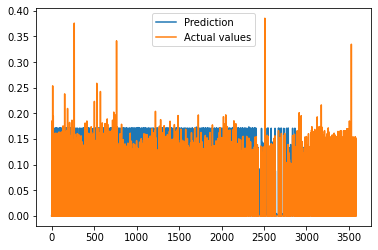

MAE:  0.013278070938360514
MSE:  0.0009525406771892657


========= FEATURE 6 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:updateConsign) ==========


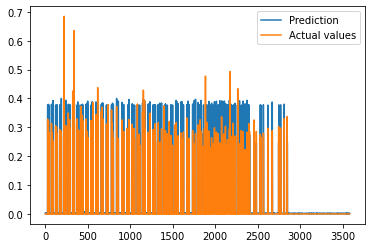

MAE:  0.007752520970842523
MSE:  0.0010071194921018702


========= FEATURE 7 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-food-service:getAllFood) ==========


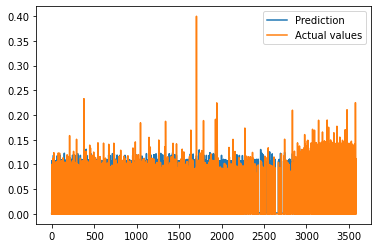

MAE:  0.005776378856481876
MSE:  0.0002558766922032573


========= FEATURE 8 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-cancel-service:cancelTicket) ==========


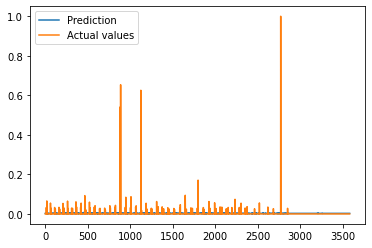

MAE:  0.0041648114092208135
MSE:  0.00063061812198312


========= FEATURE 9 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-auth-service:getToken) ==========


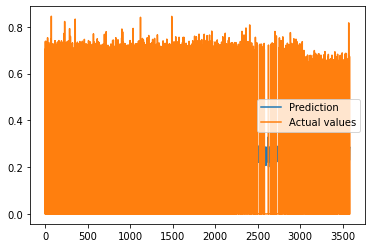

MAE:  0.2971017700692017
MSE:  0.095278145333725


========= FEATURE 10 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-assurance-service:getAllAssuranceType) ==========


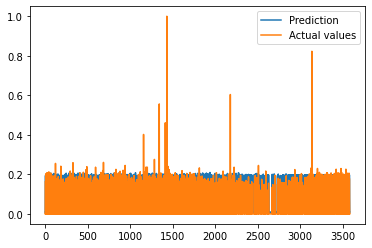

MAE:  0.016911240357544634
MSE:  0.0015951371343463927


========= FEATURE 11 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-service:queryInfo) ==========


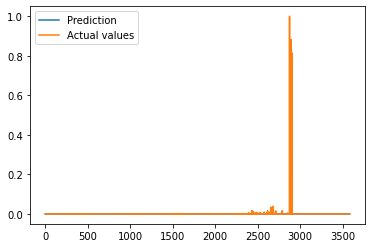

MAE:  0.0009455342838504716
MSE:  0.0006828524121214141


========= FEATURE 12 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:POST) ==========


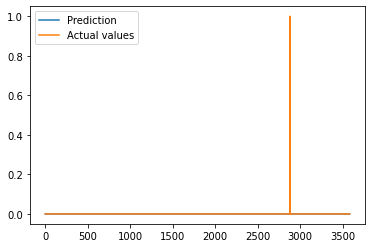

MAE:  0.0002789400278940028
MSE:  0.0002789400278940028


In [13]:
results["avv_dataset_DT_100.csv"] = MachineLearningAnalyzer("avv_dataset_DT_100.csv").perform_analysis()

Loading datasource from avv_dataset_DT_1000.csv
Datasource loaded: len = 1497
Entrypoints size: 13
Entrypoint list
[   'ENTRYPOINT_N_INVOC_API_ts-consign-service:findByOrderId',
    'ENTRYPOINT_N_INVOC_API_ts-consign-service:updateConsign',
    'ENTRYPOINT_N_INVOC_API_ts-travel-plan-service:getByCheapest',
    'ENTRYPOINT_N_INVOC_API_ts-preserve-service:preserve',
    'ENTRYPOINT_N_INVOC_API_ts-contacts-service:findContactsByAccountId',
    'ENTRYPOINT_N_INVOC_API_ts-food-service:getAllFood',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:queryOrdersForRefresh',
    'ENTRYPOINT_N_INVOC_API_ts-cancel-service:cancelTicket',
    'ENTRYPOINT_N_INVOC_API_ts-inside-payment-service:pay',
    'ENTRYPOINT_N_INVOC_API_ts-travel-service:queryInfo',
    'ENTRYPOINT_N_INVOC_API_ts-assurance-service:getAllAssuranceType',
    'ENTRYPOINT_N_INVOC_API_ts-auth-service:getToken',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:POST']


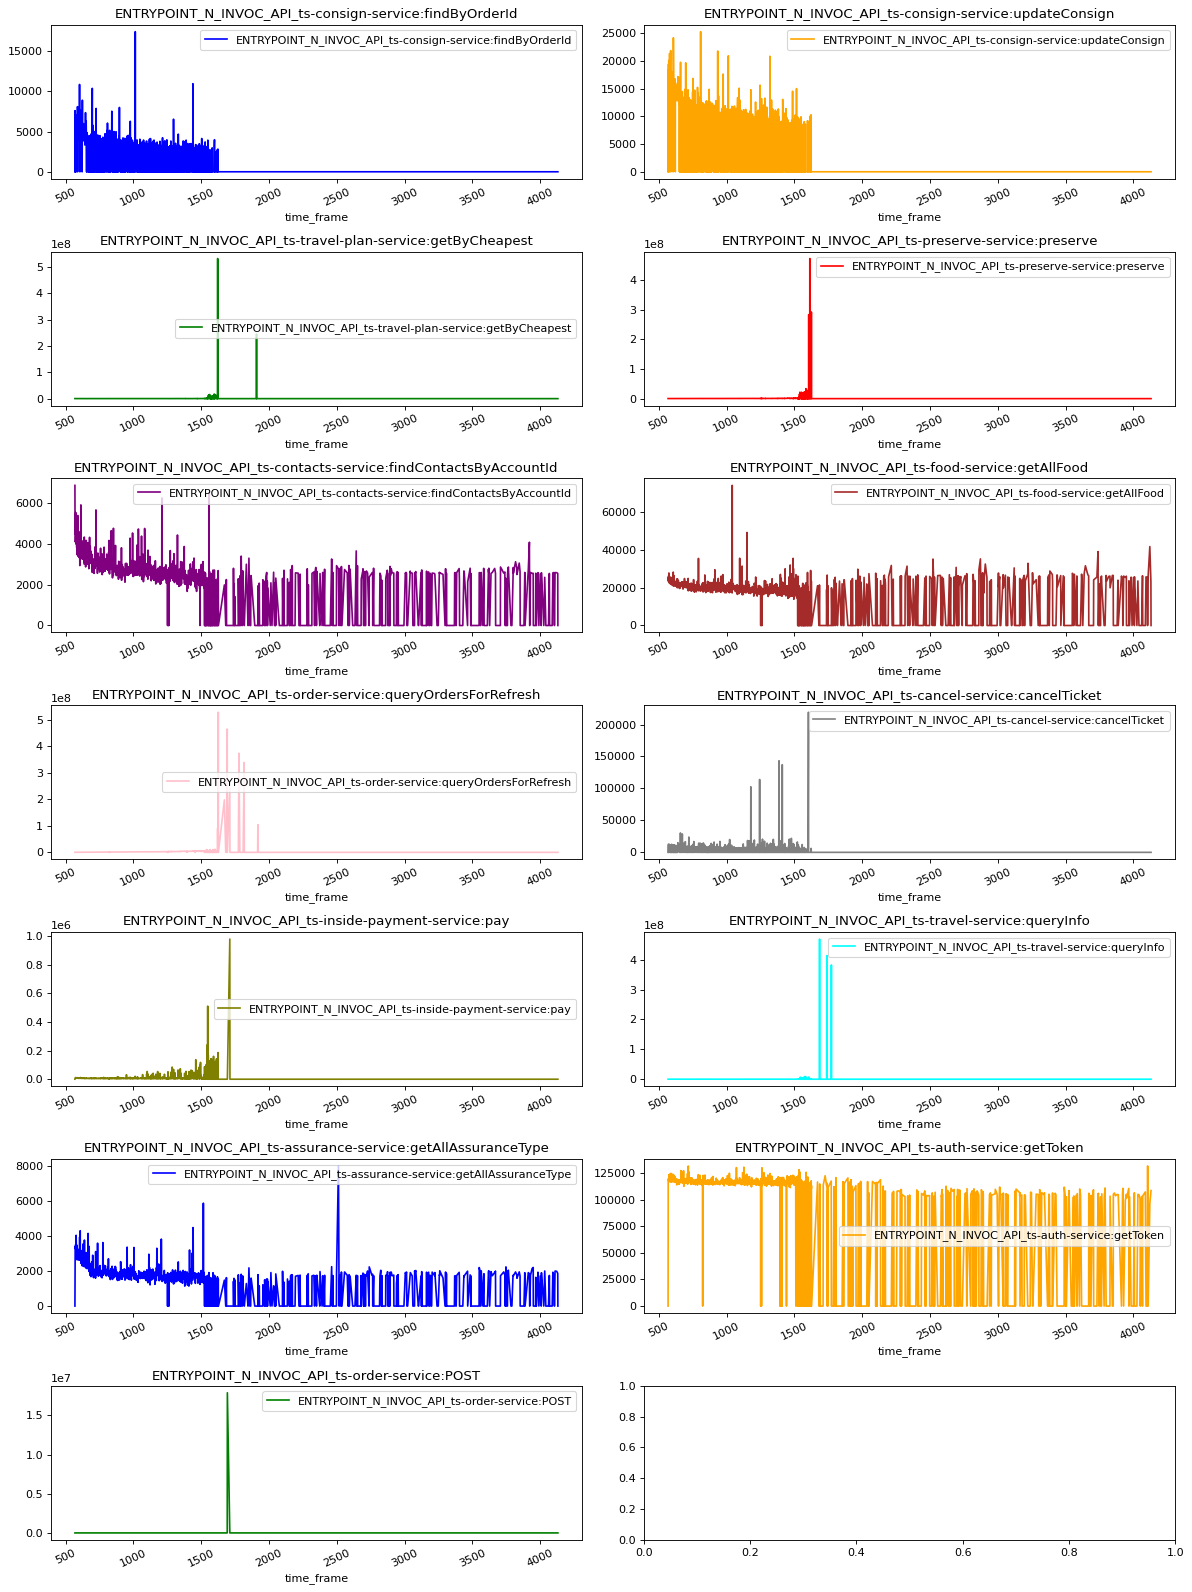

Data normalized
Input size 32 Output size 13
TOTAL MSE:  0.023072087814288097
TOTAL MAE:  0.05821604837160383


====== Prediction for 0 ========


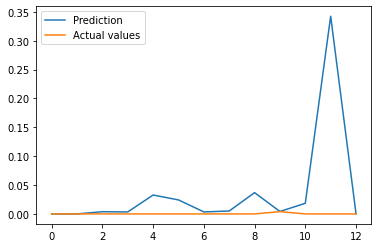



====== Prediction for 1 ========


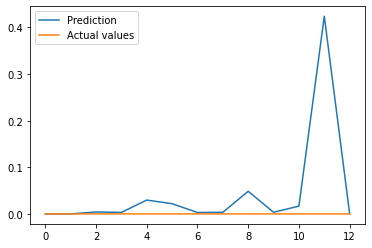



====== Prediction for 2 ========


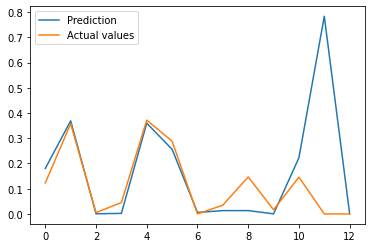



====== Prediction for 3 ========


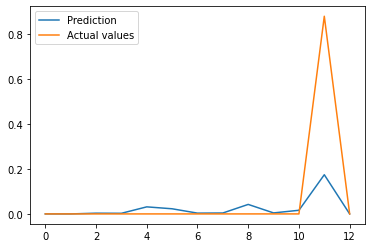



====== Prediction for 4 ========


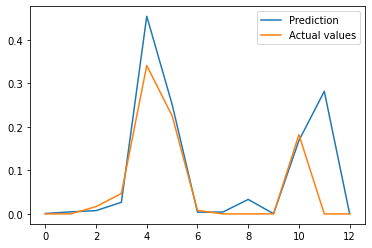



====== Prediction for 5 ========


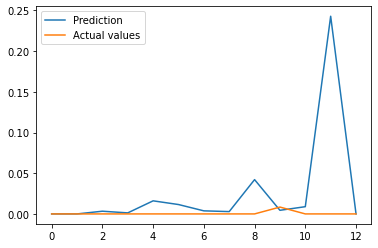



====== Prediction for 6 ========


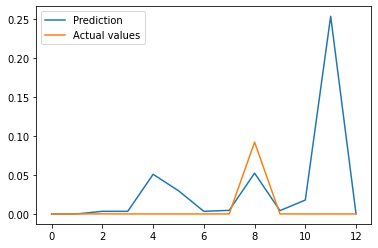



====== Prediction for 7 ========


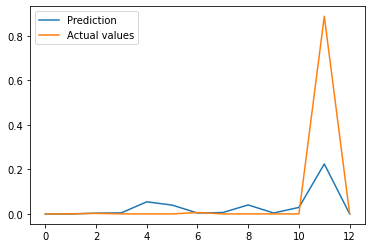



====== Prediction for 8 ========


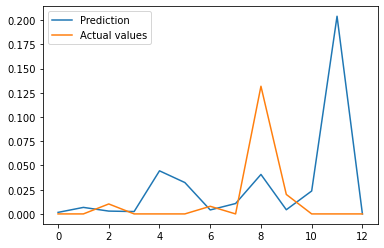



====== Prediction for 9 ========


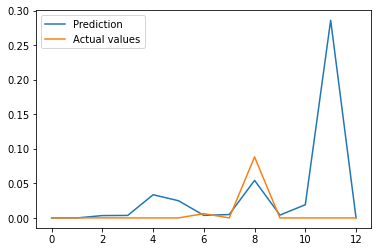



========= FEATURE 0 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:findByOrderId) ==========


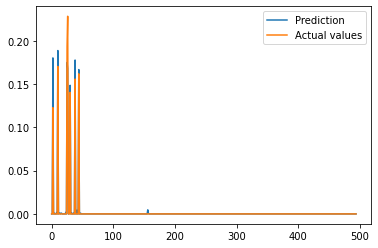

MAE:  0.0004280367204557693
MSE:  1.6731851310338016e-05


========= FEATURE 1 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:updateConsign) ==========


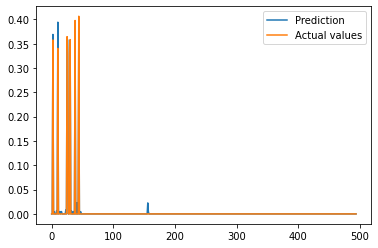

MAE:  0.0006279424998185858
MSE:  1.872174240388828e-05


========= FEATURE 2 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-plan-service:getByCheapest) ==========


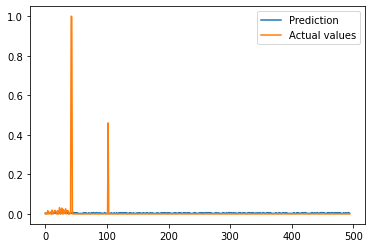

MAE:  0.009425645543871559
MSE:  0.004456082802216452


========= FEATURE 3 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-preserve-service:preserve) ==========


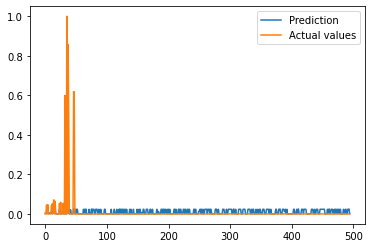

MAE:  0.01830480835798177
MSE:  0.006173435544398307


========= FEATURE 4 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-contacts-service:findContactsByAccountId) ==========


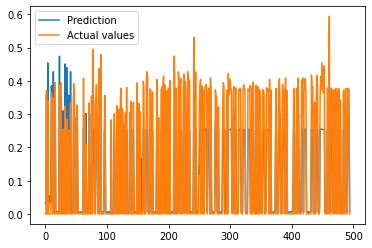

MAE:  0.054928714060930826
MSE:  0.007099461127376111


========= FEATURE 5 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-food-service:getAllFood) ==========


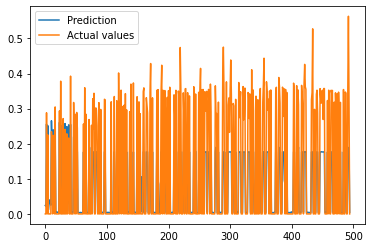

MAE:  0.06652333843084113
MSE:  0.011111891172124565


========= FEATURE 6 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:queryOrdersForRefresh) ==========


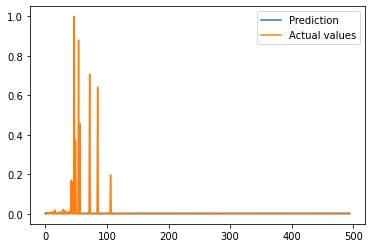

MAE:  0.012312761060008198
MSE:  0.006280528303000799


========= FEATURE 7 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-cancel-service:cancelTicket) ==========


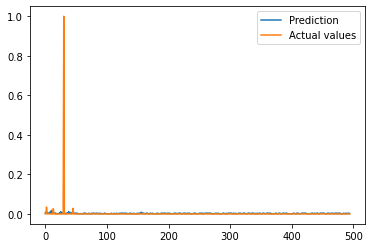

MAE:  0.004511546920296403
MSE:  0.002028246621557747


========= FEATURE 8 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-inside-payment-service:pay) ==========


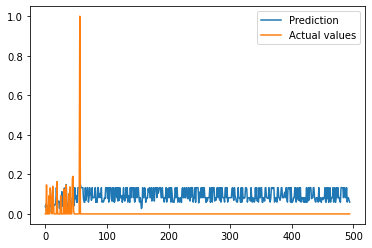

MAE:  0.09338195237946587
MSE:  0.0109240184920691


========= FEATURE 9 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-service:queryInfo) ==========


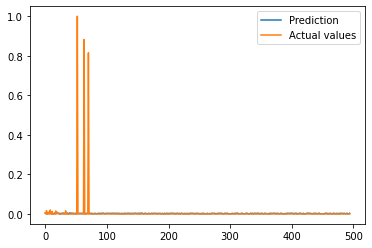

MAE:  0.007610909181480792
MSE:  0.004916193469737938


========= FEATURE 10 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-assurance-service:getAllAssuranceType) ==========


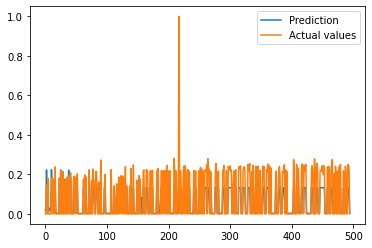

MAE:  0.03914430643344171
MSE:  0.004941224011115477


========= FEATURE 11 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-auth-service:getToken) ==========


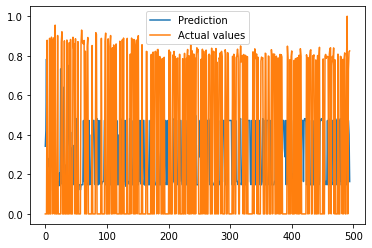

MAE:  0.44758846522205686
MSE:  0.23995040442823182


========= FEATURE 12 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:POST) ==========


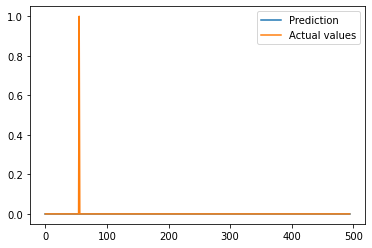

MAE:  0.00202020202020202
MSE:  0.00202020202020202


In [20]:
results["avv_dataset_DT_1000.csv"] = MachineLearningAnalyzer("avv_dataset_DT_1000.csv").perform_analysis()

Loading datasource from avv_dataset_DT_50.csv
Datasource loaded: len = 20708
Entrypoints size: 13
Entrypoint list
[   'ENTRYPOINT_N_INVOC_API_ts-travel-plan-service:getByCheapest',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:queryOrdersForRefresh',
    'ENTRYPOINT_N_INVOC_API_ts-consign-service:findByOrderId',
    'ENTRYPOINT_N_INVOC_API_ts-inside-payment-service:pay',
    'ENTRYPOINT_N_INVOC_API_ts-consign-service:updateConsign',
    'ENTRYPOINT_N_INVOC_API_ts-preserve-service:preserve',
    'ENTRYPOINT_N_INVOC_API_ts-food-service:getAllFood',
    'ENTRYPOINT_N_INVOC_API_ts-contacts-service:findContactsByAccountId',
    'ENTRYPOINT_N_INVOC_API_ts-cancel-service:cancelTicket',
    'ENTRYPOINT_N_INVOC_API_ts-auth-service:getToken',
    'ENTRYPOINT_N_INVOC_API_ts-assurance-service:getAllAssuranceType',
    'ENTRYPOINT_N_INVOC_API_ts-travel-service:queryInfo',
    'ENTRYPOINT_N_INVOC_API_ts-order-service:POST']


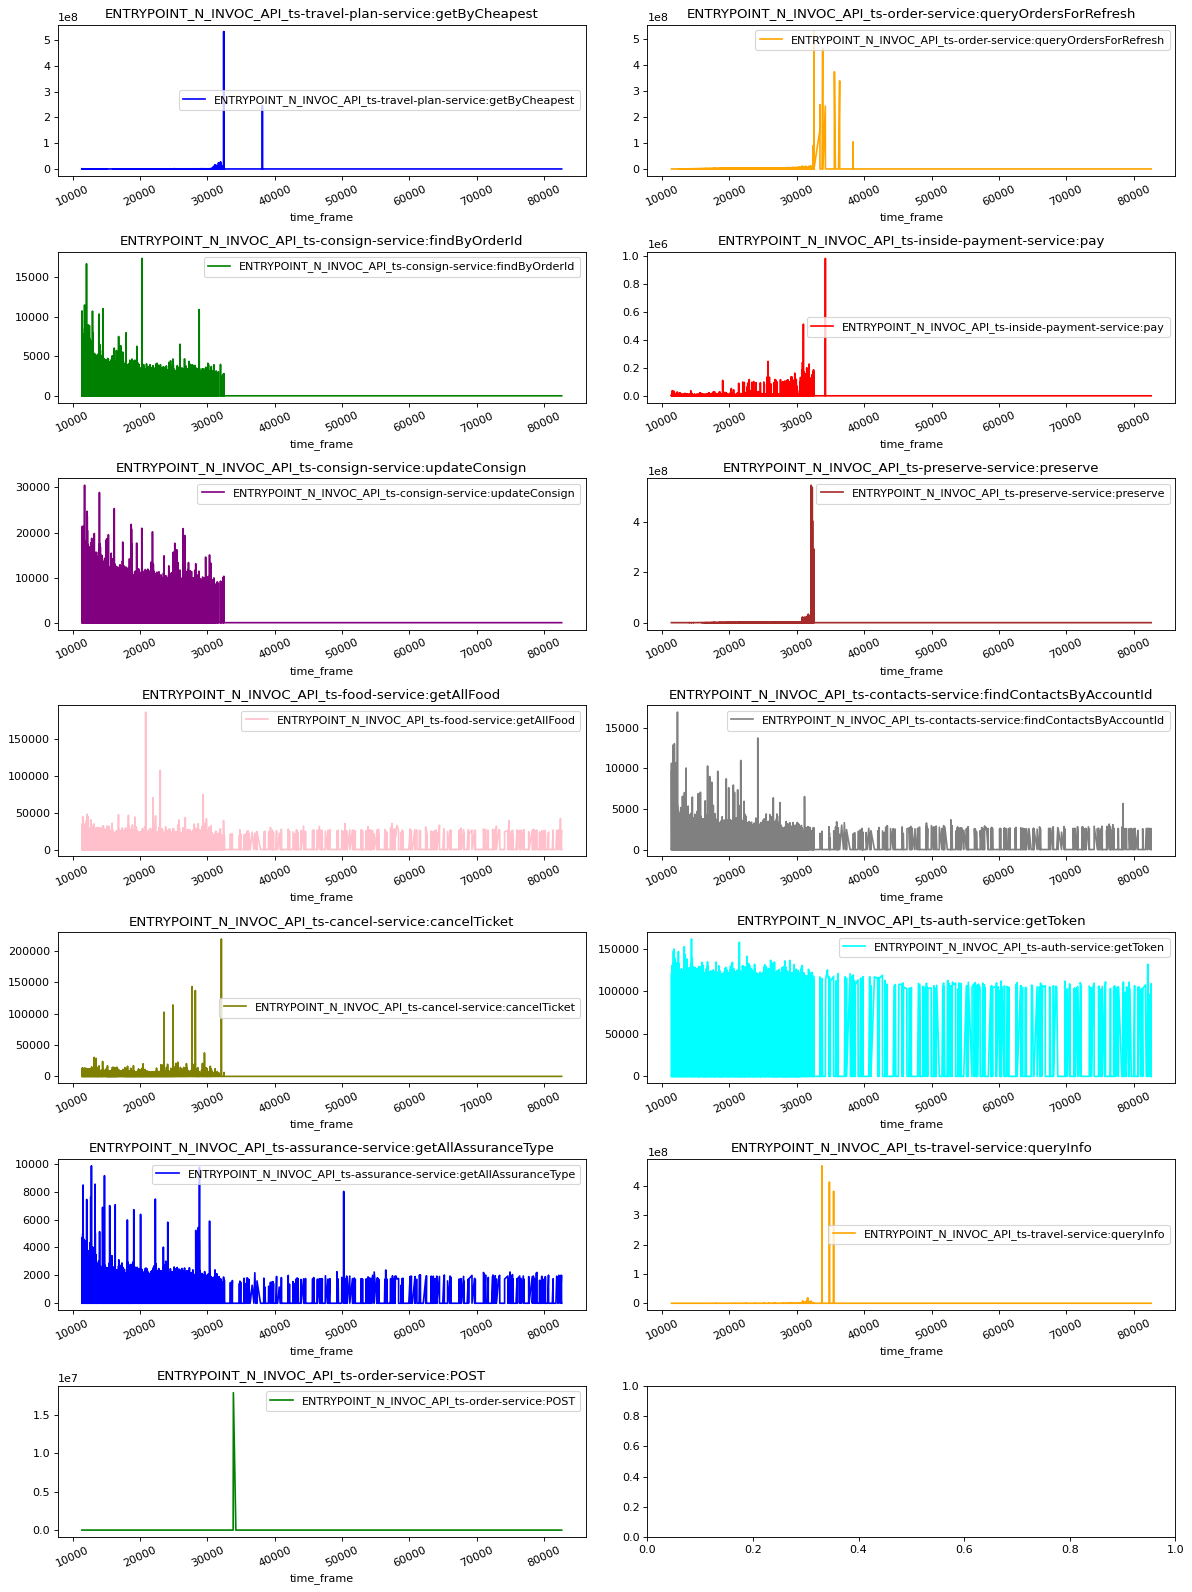

Data normalized
Input size 32 Output size 13
TOTAL MSE:  0.004832261968714627
TOTAL MAE:  0.018586167182773904


====== Prediction for 0 ========


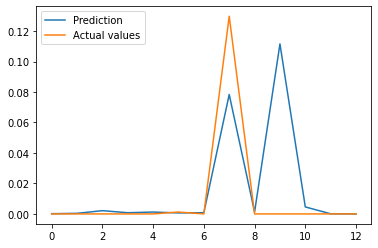



====== Prediction for 1 ========


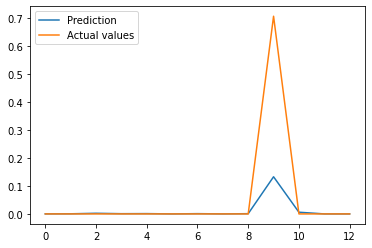



====== Prediction for 2 ========


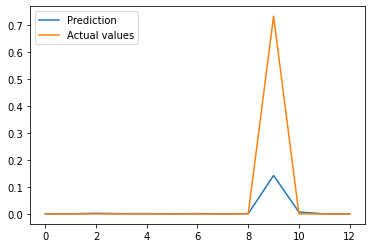



====== Prediction for 3 ========


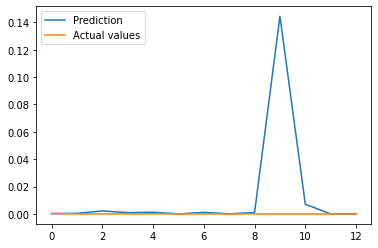



====== Prediction for 4 ========


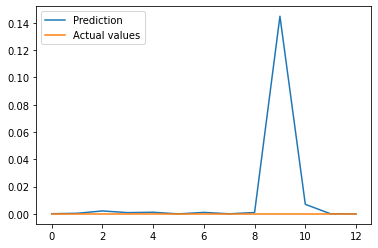



====== Prediction for 5 ========


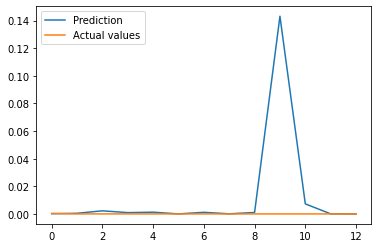



====== Prediction for 6 ========


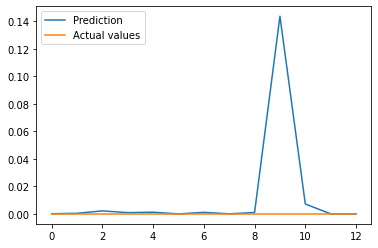



====== Prediction for 7 ========


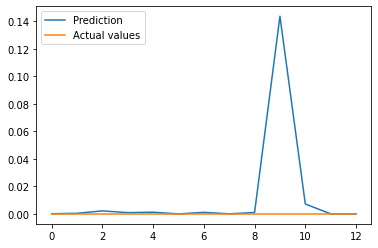



====== Prediction for 8 ========


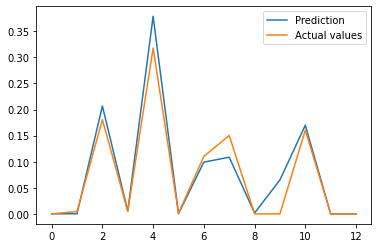



====== Prediction for 9 ========


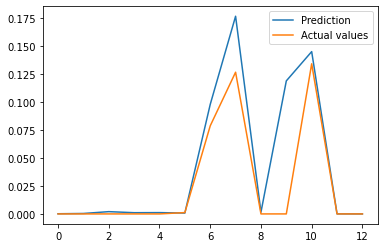



========= FEATURE 0 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-plan-service:getByCheapest) ==========


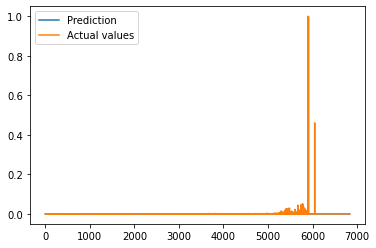

MAE:  0.0007408143040694378
MSE:  0.00032699066687705687


========= FEATURE 1 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:queryOrdersForRefresh) ==========


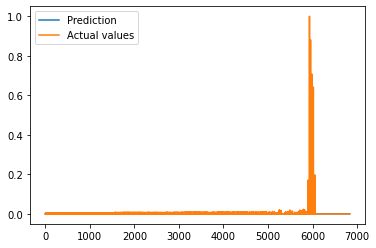

MAE:  0.0017847067892372043
MSE:  0.00048586558375465246


========= FEATURE 2 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:findByOrderId) ==========


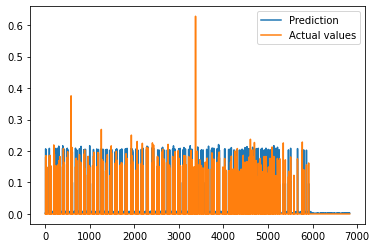

MAE:  0.005471751758529163
MSE:  0.00039501544678380464


========= FEATURE 3 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-inside-payment-service:pay) ==========


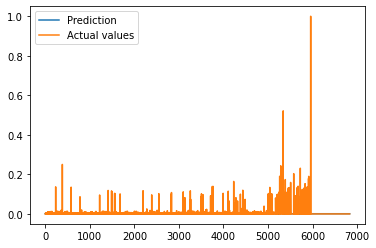

MAE:  0.0029375043521669766
MSE:  0.00037750026683515614


========= FEATURE 4 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-consign-service:updateConsign) ==========


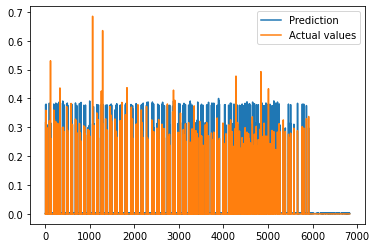

MAE:  0.00569075411549408
MSE:  0.0008982024029540622


========= FEATURE 5 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-preserve-service:preserve) ==========


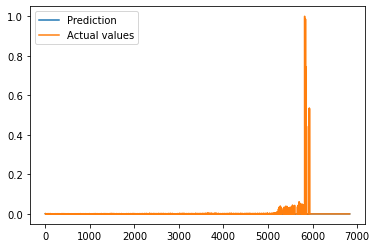

MAE:  0.0011139566531708452
MSE:  0.0006094128410448259


========= FEATURE 6 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-food-service:getAllFood) ==========


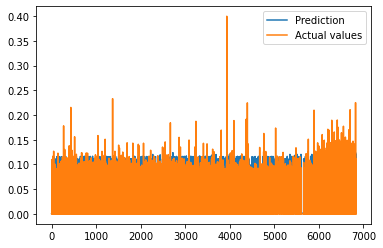

MAE:  0.003977687539425961
MSE:  0.00017655124440208835


========= FEATURE 7 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-contacts-service:findContactsByAccountId) ==========


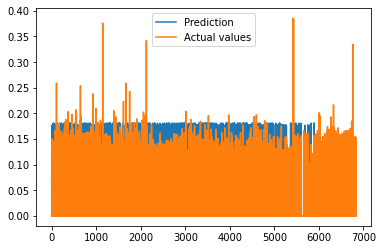

MAE:  0.011104371478696633
MSE:  0.0009896228492643191


========= FEATURE 8 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-cancel-service:cancelTicket) ==========


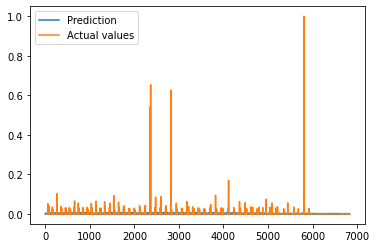

MAE:  0.0021131070323651626
MSE:  0.00033415523480712854


========= FEATURE 9 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-auth-service:getToken) ==========


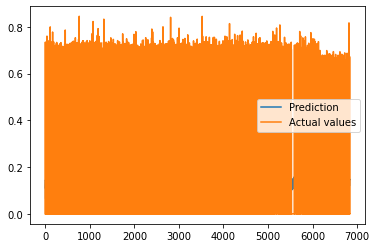

MAE:  0.1905790763160654
MSE:  0.05633443870806839


========= FEATURE 10 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-assurance-service:getAllAssuranceType) ==========


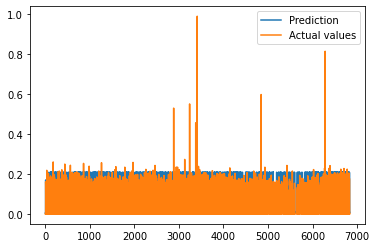

MAE:  0.015450801109785734
MSE:  0.0013870629142108681


========= FEATURE 11 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-travel-service:queryInfo) ==========


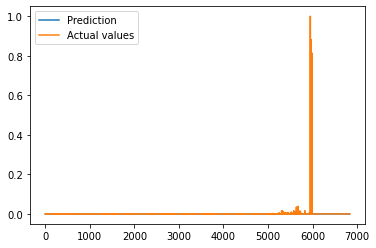

MAE:  0.00050931473946541
MSE:  0.00035826024669602553


========= FEATURE 12 ANALYSIS (ENTRYPOINT_AVG_EXTIME_ts-order-service:POST) ==========


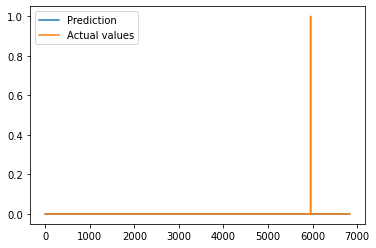

MAE:  0.0001463271875914545
MSE:  0.0001463271875914545


In [22]:
results["avv_dataset_DT_50.csv"] = MachineLearningAnalyzer("avv_dataset_DT_50.csv").perform_analysis()

In [23]:
pd.DataFrame.from_dict(results, orient="index")

,TOTAL MSE,TOTAL MAE,ENTRYPOINT_AVG_EXTIME_ts-consign-service:findByOrderId MAE,ENTRYPOINT_AVG_EXTIME_ts-consign-service:findByOrderId MSE,ENTRYPOINT_AVG_EXTIME_ts-consign-service:updateConsign MAE,ENTRYPOINT_AVG_EXTIME_ts-consign-service:updateConsign MSE,ENTRYPOINT_AVG_EXTIME_ts-travel-plan-service:getByCheapest MAE,ENTRYPOINT_AVG_EXTIME_ts-travel-plan-service:getByCheapest MSE,ENTRYPOINT_AVG_EXTIME_ts-preserve-service:preserve MAE,ENTRYPOINT_AVG_EXTIME_ts-preserve-service:preserve MSE,...,ENTRYPOINT_AVG_EXTIME_ts-inside-payment-service:pay MAE,ENTRYPOINT_AVG_EXTIME_ts-inside-payment-service:pay MSE,ENTRYPOINT_AVG_EXTIME_ts-auth-service:getToken MAE,ENTRYPOINT_AVG_EXTIME_ts-auth-service:getToken MSE,ENTRYPOINT_AVG_EXTIME_ts-travel-service:queryInfo MAE,ENTRYPOINT_AVG_EXTIME_ts-travel-service:queryInfo MSE,ENTRYPOINT_AVG_EXTIME_ts-assurance-service:getAllAssuranceType MAE,ENTRYPOINT_AVG_EXTIME_ts-assurance-service:getAllAssuranceType MSE,ENTRYPOINT_AVG_EXTIME_ts-order-service:POST MAE,ENTRYPOINT_AVG_EXTIME_ts-order-service:POST MSE
avv_dataset_DT_500.csv,0.015532,0.035805,0.004717,0.000399,0.008302,0.000739,0.004052,0.002597,0.007079,0.004180,...,0.011996,0.002206,0.332915,0.175544,0.003565,0.002860,0.024231,0.002761,0.001170,0.001170
avv_dataset_DT_100.csv,0.008037,0.028048,0.006563,0.000422,0.007753,0.001007,0.001255,0.000622,0.002103,0.001160,...,0.005320,0.000678,0.297102,0.095278,0.000946,0.000683,0.016911,0.001595,0.000279,0.000279
avv_dataset_DT_1000.csv,0.023072,0.058216,0.000428,0.000017,0.000628,0.000019,0.009426,0.004456,0.018305,0.006173,...,0.093382,0.010924,0.447588,0.239950,0.007611,0.004916,0.039144,0.004941,0.002020,0.002020
avv_dataset_DT_50.csv,0.004832,0.018586,0.005472,0.000395,0.005691,0.000898,0.000741,0.000327,0.001114,0.000609,...,0.002938,0.000378,0.190579,0.056334,0.000509,0.000358,0.015451,0.001387,0.000146,0.000146
